#**Первое занятие по PyTorch**

Изучаем основные понятия и три ключевых пакета PyTorch, разбираемся, как формируется стандартный, универсальный алгоритм построения и анализа модели.

Этот алгоритм вы сможете сразу использовать для проверки самых разных гипотез.


---




*Дискламер: местами будут использоваться явные англицизмы -- чтобы быть в курсе, довольно часто они используются в тематических обсуждениях на русскоязычных форумах, и более компактны и наглядны.*


---

**Параллельно очень рекомендую к прочтению эту серию статей (перевод книги Майкла Нильсена "Neural Networks and Deep Learning")**
https://habr.com/ru/post/463171/

В ней подробно рассматривается вся базовая теория нейронных сетей и глубокого обучения.

---

##**Простая линейная регрессия**

Есть простая линейная функция,  

`y = 1 + 2 * x + шум`

которая в контексте машинного обучения трактуется как прогнозирование некоторых результатов.

x -- это **входные данные, признаки (features)**;
y -- это **прогноз**.

Например, если автомобиль едет с линейной скоростью, то пройденное им расстояние зависит от времени езды. В данных из реальной жизни в такой зависимости всегда будет шум -- скорость всё время немножечко плавает, возможны остановки на светофорах и т. д.

Принципиальный момент. Чем вообще мы занимаемся?

В нашей функции есть два коэффициента 1 и 2, или в общем случае

`y = a + b * x`

это коэффициенты (**параметры**) a и b, которые ещё называются **метки (labels)**.

Про наши данные (например, набор пар значений "время - расстояние") мы знаем только, что они с большой вероятностью моделируются подобной линейной регрессией. То есть то, что нам надо найти -- это такие a и b, что соответствующая функция будет выдавать значения, как можно более близкие к обучающим.


---





##**Немного теории: градиентный спуск**

**Градиент (gradient)** -- это частная производная (производная по одной  конкретной переменной).

*Кто не помнит школьный курс математики, производная -- это просто скорость изменения чего-то. Например, если вы едете с фиксированной скоростью, она не меняется, то и производная её (ускорение) будет равно нулю. А если скорость всё время растёт, то и градиент (ускорение) будет больше нуля, и тем он будет больше, чем сильнее увеличивается скорость.*

В общем случае модель включает в себя множество параметров (скорость автомобиля -- это функция от множества критериев), и градиент показывает, как сильно меняется (со временем например) какой-то один конкретный параметр (считаем частную производную по этому параметру), подразумевая, что остальные если и меняются, то незначительно.

**Лосс (loss)** -- ошибка, погрешность (например, среднеквадратическая ошибка).

Оптимизационный механизм, отыскивающий нужные нам коэффициенты, называется "**градиентный спуск**" (подобных алгоритмов много). Его работа складывается из четырёх шагов.

1) считаем лосс (стратегически стремимся к его минимизации).

2) вычисляем градиенты.

У нас в модели, как уже говорилось, есть два параметра a и b, для которых мы должны считать градиенты. Мы хотим определить, как будет меняться лосс при изменении каждого из этих параметров.

3) обновляем параметры. Так как мы хотим минимизировать лосс, то градиенты берутся с обратным знаком, и учитывается также коэффициент скорости обучения.

**Скорость обучения (learning rate)** -- некоторый коэффициент, который учитывается при изменении параметров в градиентном спуске.

4) при необходимости проверяем что получилось, и переходим к п.1.

Такой цикл из четырёх шагов называется **эпоха (epoch)**.
Эпоха -- один цикл оптимизации (например, шаг градиентного спуска), когда была пересчитана каждая точка выборки.


---





##**Градиентный спуск на базе NumPy**

Реализуем сперва градиентный спуск классическим способом: только с помощью стандартной библиотеки численных методов NumPy.


---



Подробное введение в линейную алгебру и NumPy для начинающих:

https://github.com/DLSchool/dlschool/tree/master/02.%20Linear%20Algebra%2C%20Numpy


---



Введение в Matplotlib (рисуем графики):

https://github.com/DLSchool/dlschool/tree/master/03.%20Pandas%2C%20Matplotlib%2C%20ML%20basics


---



Введение в линейные модели и градиентный спуск:

https://github.com/DLSchool/dlschool/tree/master/04.%20Linear%20Models


---



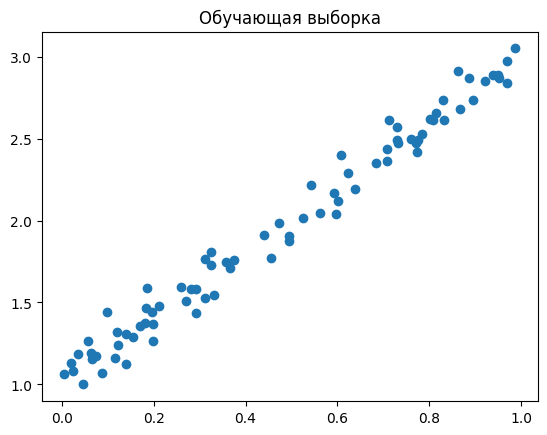

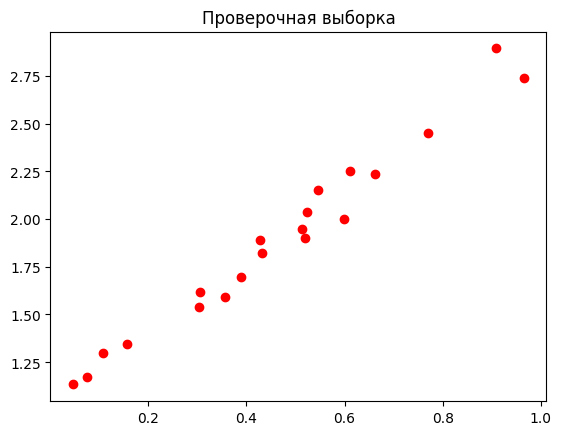

In [18]:
#
# оригинал
# https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e

import numpy as np
import matplotlib.pyplot as plt

# инициализация повторяемой последовательности случайных чисел
np.random.seed(42)

# создаём np-массив из 100 случайных чисел в диапазоне 0..1
sz = 100
x = np.random.rand(sz, 1)

# строим функцию y = f(x) и добавляем немного гауссова шума
y = 1 + 2 * x + 0.1 * np.random.randn(sz, 1)

# формируем индексы от 0 до 99
idx = np.arange(sz)
# случайно их тасуем
np.random.shuffle(idx)


# первые 80 случайных индексов (значений x) используем для обучения
sz80 = (int)(sz*0.8)
train_idx = idx[: sz80]

# оставшиеся 20 -- для валидации
val_idx = idx[sz80:]

# формируем наборы обучающих данных
x_train, y_train = x[train_idx], y[train_idx]
# и наборы для валидации
x_val, y_val = x[val_idx], y[val_idx]

# выводим на экран
plt.scatter(x_train, y_train)
plt.title('Обучающая выборка')
plt.show()
plt.scatter(x_val, y_val, color= "red")
plt.title('Проверочная выборка')
plt.show()



In [19]:
np.random.seed(42)

# задаём начальные случайные значения коэффициентам линейной регрессии
a = np.random.randn(1)
b = np.random.randn(1)
print(a,b)

# скорость обучения
lr = 0.1
# количество эпох
n_epochs = 1000

# основной цикл
for epoch in range(n_epochs):

    # рассчитываем результирующий массив с текущими коэффициентами a и b
    # на основе обучающей выборки
    yhat = a + b * x_train

    # 1. определяем лосс
    # сперва считаем отклонение нового результата от обучающего:
    error = (y_train - yhat)
    # и затем считаем среднеквадратическую ошибку:
    loss = (error ** 2).mean()

    # 2. считаем градиенты (вспоминая формулу производной)
    # для коэффициента a
    a_grad = -2 * error.mean()
    # для коэффициента b
    b_grad = -2 * (x_train * error).mean()

    # 3. обновляем параметры, используя коэффициент скорости обучения,
    # градиенты берём с обратным знаком
    a = a - lr * a_grad
    b = b - lr * b_grad
print(a,b)


[0.49671415] [-0.1382643]
[1.02354094] [1.96896411]


Итак, исходные коэффициенты были очень далеки от оригинальных:
[0.49671415] [-0.1382643]

Но итоговые результаты оказались весьма близки к ним:
[1.02354094] [1.96896411]

Более того, на основании нашей случайной выборки какие-то более точные значения коэффициентов получить уже практически нельзя.


---



##**Тензоры**

В пакетах машинного обучения основная работа ведётся как правило с тензорами.

**Тензор** -- это обычно вектор (одномерный массив), двумерный массив (матрица), в общем случае многомерный массив.

Операции над тензорами очень эффективно выполняются графическими процессорами, поэтому библиотеки машинного обучения оптимизируются под GPU.

Над тензорами возможны как обычные арифметические матричные операции, так и множество дополнительных действий.

**Скаляр** -- это массив с нулём измерений, или просто одно число.


---




Введение и практика с тензорами на PyTorch, рекомендую пройти:

https://github.com/DLSchool/dlschool/blob/master/06.%20PyTorch/%5Bseminar%5Dpytorch_basics.ipynb


---



##**Берёмся за PyTorch**

В PyTorch активно применяется понятие девайса.

**Девайс (device)** -- устройство, на котором обрабатываются тензоры (графический процессор или обычный).

Начало работы с PyTorch обычно строится по типовому шаблону:

-- проверяем, доступны ли ресурсы GPU;

-- готовим наши данные, преобразовывая в формат тензоров (для массивов NumPy это функция from_numpy);

-- при желании данные можно привести к типу меньшей точности (например, 32-разрядному float), чтобы сэкономить ресурсы;

-- выгружаем данные на конкретный девайс (GPU или обычный процессор) с помощью функции to().

Тип тензора можно получить методом type(), который вернёт, например, torch.FloatTensor, если используется обычный процессор, или torch.cuda.FloatTensor, если GPU.


In [30]:
import torch # подключаем основной пакет PyTorch

# стандартная команда настройки девайса на GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

# Наши исходные данные хранятся в формате массивов NumPy,
# требуется преобразовать их в формат тензоров PyTorch,
# привести к типу float и выгрузить на девайс
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)
print(x_train_tensor.type())

cpu
torch.FloatTensor


Теперь запрограммируем градиентный спуск, те же четыре шага, с помощью PyTorch.

Сперва проинициализируем параметры (тензоры) a и b, используя случайные функции PyTorch.

В параметрах функции генерации случайного значения torch.randn() в дополнение к понятным параметрам dtype (желаемый тип результирующего тензора) и целевой девайс (device), указывается очень важный requires_grad = True. Его смысл подробнее рассмотрим позже, но основная его идея в том, что он задаёт автоматическое вычисление градиента для данного тензора. Мы ведь считаем градиенты именно по этим двум параметрам a и b.

In [21]:
# инициализация повторяемой посл-ти случайных чисел
torch.manual_seed(42)

# задаём начальные случайные значения коэффициентам линейной регрессии
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


Значения a и b зависят от версии PyTorch.

---




##**Autograd: автоматизируем расчёт градиентов**

Autograd -- пакет автоматического дифференцирования PyTorch (один из трёх ключевых). Он очень крутой: можно забыть про частные производные, ручное программирование формул производных и многую другую математику -- теперь она скрыта под капотом autograd!

https://pytorch.org/docs/stable/autograd.html?highlight=autograd#module-torch.autograd

Нам теперь не нужно вручную программировать производные -- **вычисления всех градиентов выполняет универсальный метод backward()**. Так как мы вычисляем частные производные для лосса, к нему этот метод и применяем, вся магия совершится автоматически внутри него. А текущие значения градиентов мы можем получить обращением к атрибуту **grad** соответствующего тензора.

Однако если далее мы захотим обновить параметры по старой схеме, появятся ошибки.



In [31]:
# скорость обучения
lr = 0.1

# количество эпох
n_epochs = 1000

for epoch in range(n_epochs):

    # как и в примере с numpy, записываем нашу линейную зависимость,
    # только теперь в качестве обучающей выборки -- тензор
    yhat = a + b * x_train_tensor

    # 1. считаем лосс как и раньше
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()

    # 2. вычисляем градиенты автоматически!
    loss.backward()


    # ПЕРВАЯ ПОПЫТКА (неверно)
    # TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'
    # a = a - lr * a.grad
    # b = b - lr * b.grad

    # ВТОРАЯ ПОПЫТКА (неверно)
    # RuntimeError: a leaf Variable that requires grad has been used in an in-place operation.
    # a -= lr * a.grad
    # b -= lr * b.grad

    # ТРЕТЬЯ ПОПЫТКА (верно)
    with torch.no_grad():
        a -= lr * a.grad
        b -= lr * b.grad

    # Обнуляем градиенты вручную
    a.grad.zero_()
    b.grad.zero_()

print(a, b)

tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


В первом случае мы не учли, что по умолчанию **все действия и операции над тензорами иммутабельны**. Мы формируем новые тензоры в процессе арифметических операций и при переназначении нашим параметрам их же обновлённых значений градиенты сбрасываются в начальное значение None, и возникает подобная ошибка.

Нам надо выполнять обновления параметров непосредственно в них самих (**in place**) -- работать с ними как с мутабельными объектами, без создания промежуточных данных. Но и вторая попытка обновления с помощью стандартной питоновской in-place операции -= тоже выдаст ошибку.


Дело в том, что PyTorch строит **динамический вычислительный граф** (см. далее) для каждой питоновской операции, которая прямо или косвенно связана с тензорами, для которых считаются градиенты. И чтобы временно отключить такой режим по умолчанию, надо воспользоваться методом **torch.no_grad()**, который позволяет выполнять операции над тензорами в отрыве от графа вычислений. Именно это мы и делаем в третьей попытке.


И наконец, надо ещё учесть, что **градиенты автоматически не обнуляются, а накапливаются** -- в каждой эпохе их надо обнулять вручную. В PyTorch принято, что все методы по умолчанию иммутабельны (не воздействуют на своего родителя), а их мутабельные (in place) версии (полезные например, когда мы не хотим создавать промежуточные копии крупных объектов) отличаются символом подчёркивания в конце своего названия.
Обнуление градиента "на месте" выполнит соответствующий метод **zero_()**.

Итак, мы получаем итоговый результат, очень близкий к версии NumPy:
tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


---




##**Динамический граф вычислений**

**Вычислительный граф** -- это направленный граф, в узлах которого выполняются некоторые вычисления.

Вычисления в узлах графа используют данные, которые были вычислены в "предыдущих" узлах.

Каждый узел графа -- по сути чистая функция, получающая на вход данные от связанных с ним узлов; по этой причине исполнение вычислительного графа хорошо распараллеливается.

По большому счёту, от фреймворков машинного обучения требуются три основные вещи: **формировать граф вычислений, дифференцировать его, и вычислять**.
В PyTorch такой граф строится динамически при запуске кода, и по нему можно проходить как вперёд, от начала к концу, так и обратно, от конца в начало.

Зачем же этот граф нужен, как он связан с нашим кодом, как это вообще работает?

Пакет PyTorchViz содержит средства визуализации графов вычислений. Установите его:


In [23]:
!pip install torchviz

zsh:1: command not found: pip


Подготовим минималистичный код: два тензора с поддержкой градиентов, формулу прогнозирования, погрешость и лосс.

Функция **make_dot(yhat)**, получающая на вход тензор, связанный с формулой прогнозирования, сформирует такое изображение графа:


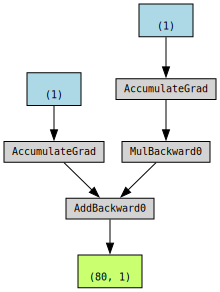

In [51]:
import torchviz

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()

torchviz.make_dot(loss) # визуализируем граф вычислений

Синие квадратики -- это наши параметры, тензоры, для которых считаются градиенты. Серые квадратики -- это операции Python над этими тензорами или над зависимыми от них значениями.

Зелёные квадратики -- то же, что и серые, только в них вычисляются градиенты.

Кто знаком с абстрактным синтаксическим деревом, наверняка увидит тут определённое сходство.

По названиям квадратов легко определить их смысл -- префиксы определяют вид арифметических операций. Сперва Mul (умножение) выполняет умножение одного параметра: b * x_train_tensor, затем результат складывается (Add) с вторым параметром a, далее из y_train_tensor вычитается (Sub) что получилось, затем возводится в степень (Pow), и наконец вычисление среднего Mean -- это заключительная точка, в которой будут рассчитываться градиенты.


---



**Вычисление градиентов в графе происходит снизу вверх!** Зелёный квадрат -- это стартовая точка такого процесса. Не вдаваясь в детали, отметим, что это так называемое **обратное автоматическое дифференцирование** -- мы начинаем с операции, где было получено результирующее значение, и движемся от неё обратно по графу, вычисляя таким образом производные.


---




Почему в одних случаях в квадраты входят две стрелки (как и должно быть с точки зрения двух параметров арифметических операций), а в других всего одна? Какой там второй параметр арифметической операции?

Дело в том, что в графе не требуются отдельные квадраты для, например, x или y, потому что мы не считаем градиенты для них. Независимо от количества задействованных тензоров в выражении **в графе учитываются только те параметры, для которых вычисляются градиенты**.

Например, попробуйте изменить в команде создания параметра "a" его настройку requires_grad на False:

`a = torch.randn(1, requires_grad=False, dtype=torch.float, device=device)`

Получится граф из шести квадратиков, которые будут линейно связаны друг с другом одиночными стрелками.


##**Задание 1**

Выведите графы для error и yhat -- почему получились такие отличия?


---




##**Дифференцирование условных конструкций**

Самая крутая особенность динамического вычислительного графа в PyTorch в том, что он понимает фактически любые управляющие конструкции Python, код любой сложности. Это по сути означает, что их тоже можно дифференцировать!

Следующий код, дополненный условием (оно само по себе не имеет никакого смысла), выведет интересный граф:


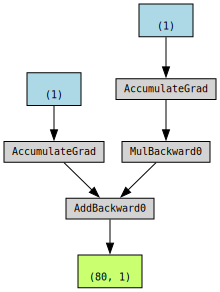

In [55]:
import torchviz

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()

# это полная чушь! этот код только для демонстрации разветвления в графе!
if loss > 0:
  yhat2 = b * x_train_tensor
  error2 = y_train_tensor - yhat2

loss += error2.mean()



torchviz.make_dot()

**Важно**. В графе формируется не линейная последовательность действий, как в коде.

**Граф -- это не блок-схема!** В случае блок-схемы алгоритма требовалось бы делать разветвление после первого расчёта loss, а в данном случае видны два независимых вычислительных блока, которые разветвляются не по условию if loss > 0 , а по вхождению параметров (в данном случае параметра b) в различные цепочки вычислений. Эти блоки/цепочки в процессе вычисления градиентов комбинируются автоматически.


---



##**Оптимизатор**

Несмотря на автоматическое вычисление градиентов, сейчас мы, как и в случае с NumPy, параметры обновляем вручную, явными командами в коде. Сейчас их всего два, но что если их будут сотни или тысячи, как в крупных и сложных моделях? На помощь приходят оптимизаторы. **Пакет torch.optim -- это второй из трёх ключевых пакетов PyTorch**.



Оптимизатор получает на вход список параметров, скорость обучения и возможно ещё ряд других настроечных коэффициентов, и выполняет их автоматическое обновление с помощью метода **step().** Не требуется в таком случае и ручного обнуления градиентов -- для этого есть метод **zero_grad()**.


Различные алгоритмы оптимизации и реализованы в данном пакете torch.optim.  Один из популярных алгоритмов -- это **стохастический градиентный спуск** (Stochastic Gradient Descent, SGD). Как он работает внутри, на данном шаге неважно, достаточно знать, что он умеет реализовывать пакетный спуск -- используя в обновлении сразу всю обучающую выборку.

https://pytorch.org/docs/stable/optim.html?source=post_page---------------------------#torch.optim.SGD

Всё, что потребуется изменить в исходном коде -- это создать сам оптимизатор, связав его с параметрами, и соответственно, сменить ручное обновление параметров a и b и обнуление их градиентов на вызов методов оптимизатора step() и zero_grad().


In [26]:
from torch import optim

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

# скорость обучения
lr = 0.1

# количество эпох
n_epochs = 1000

# создаём SGD оптимизатор для автоматического обновления параметров
optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()
    loss.backward()

    # with torch.no_grad():
    #    a -= lr * a.grad
    #    b -= lr * b.grad
    optimizer.step()

    # a.grad.zero_()
    # b.grad.zero_()
    optimizer.zero_grad()

print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


Параметры в начале и после обучения:

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)

tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)

По сути, мы таким образом оптимизировали процесс оптимизации!


---



##**Лосс**

Сейчас и лосс мы пока считаем вручную, явно записывая формулу расчёта
loss = (error ** 2).mean(). На помощь приходит **третий (из трёх) ключевой пакет PyTorch -- torch.nn**, добавляющий уровень абстракции для довольно низкоуровневых возможностей autograd.

https://pytorch.org/docs/stable/nn.html?highlight=nn#module-torch.nn

В нём, в частности, содержится набор стандартных функций для расчёта всевозможных видов ошибок/погрешностей.

В нашем случае, функция расчёта среднеквадратичной ошибки называется **MSELoss**. Сама по себе это не функция, которая вызывается напрямую, а скорее "фабрика" функций, которая создаёт нужную нам функцию, причём можно этой фабрике задавать параметры желаемой функций, методы агрегации данных (например, reduction="mean" означает вычисление среднего, reduction="sum" означает вычисление суммы). На вход подобным функциям подаётся обучающая выборка и тензор с параметрами, для которых рассчитываются градиенты.


tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True) tensor([0.2345], requires_grad=True)
tensor([0.9404], requires_grad=True) tensor([1.0432], requires_grad=True) tensor([0.2345], requires_grad=True)


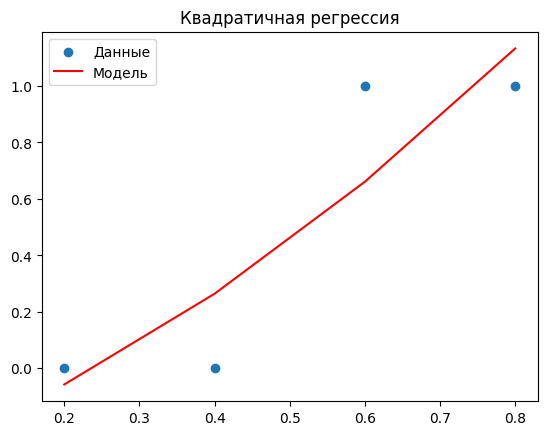

In [61]:
from torch import optim, nn
import matplotlib.pyplot as plt

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
c = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b, c)

# скорость обучения
lr = 0.1

# количество эпох
n_epochs = 1000

# функция расчёта лосса
loss_fn = nn.MSELoss(reduction='mean')

# создаём SGD оптимизатор для автоматического обновления параметров
optimizer = optim.SGD([a, b, с], lr=lr)

for epoch in range(n_epochs):
    yhat = a * x_train_tensor ** 2 + b * x_train_tensor + с

    # error = y_train_tensor - yhat
    # loss = (error ** 2).mean()
    loss = loss_fn(yhat, y_train_tensor)

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

print(a, b, c)

plt.scatter(x_train_tensor.detach(), y_train_tensor.detach(), label="Данные")
plt.plot(x_train_tensor.detach(), yhat.detach(), color='red', label="Модель")
plt.legend()
plt.title("Квадратичная регрессия")
plt.show()

Обратите внимание, что мы уже избавились фактически от всего ручного кодирования, связанного с градиентами и другими оптимизационными расчётами!

**Получился по сути шаблон, в котором осталась только явно одна задаваемая вручную строка, где вычисляется yhat -- она определяет нашу формулу прогноза, и её можно менять на любые другие нужные нам для анализа зависимости.**

Соответственно, напрашивается вопрос, а можно ли как-то абстрагировать и этот момент, чтобы не искать в оптимизационном коде нужную строчку, да и в целом перейти на более удобный формат представления изучаемых зависимостей? Такая форма абстракции в PyTorch -- это модель.

Созданию моделей PyTorch посвящено следующее занятие.

##**Задание 2**

Измените в данном шаблоне прогноз на основе линейной регрессии на более сложную зависимость. С функциями прогноза какой сложности сможет уверенно справиться наш простой базовый шаблон PyTorch?



---


https://vk.com/lambda_brain